In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
%run Data_manipulation.ipynb

In [14]:
#LSTM autoencoder

def detect_anomalies_lstm_autoencoder(df, lookback=10, epochs=50, batch_size=64):
    """
    Detect anomalies in a time series using LSTM Autoencoder.

    Parameters:
    - df: DataFrame containing the time series data with a 'Close' column.
    - lookback: Number of past days to use for prediction.
    - epochs: Number of training epochs.
    - batch_size: Number of samples per batch.

    Returns:
    - anomalies: DataFrame containing the detected anomalies.
    """
    scaled_data = df['Close'].values.reshape(-1, 1)
    
    # Create sequences
    def create_sequences(data, lookback):
        sequences = []
        for i in range(len(data) - lookback):
            sequences.append(data[i:i + lookback])
        return np.array(sequences)
    
    sequences = create_sequences(scaled_data, lookback)
    
    # Build LSTM Autoencoder
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(lookback, 1), return_sequences=True),
        LSTM(32, activation='relu', return_sequences=False),
        RepeatVector(lookback),
        LSTM(32, activation='relu', return_sequences=True),
        LSTM(64, activation='relu', return_sequences=True),
        TimeDistributed(Dense(1))
    ])
    model.compile(optimizer='adam', loss='mse')
    
    # Train the model
    model.fit(sequences, sequences, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False)
    
    # Predict on the same sequences
    predictions = model.predict(sequences)
    
    # Calculate reconstruction error
    mse = np.mean(np.power(sequences - predictions, 2), axis=(1, 2))
    threshold = np.percentile(mse, 95)  # Threshold for anomalies
    
    # Detect anomalies
    anomalies = df.iloc[lookback:][mse > threshold]
    
    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected using LSTM Autoencoder')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies


# NIFTY

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - loss: 0.0038 - val_loss: 0.0641
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0500 - val_loss: 0.0335
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0246 - val_loss: 0.0417
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0187 - val_loss: 0.0230
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0250 - val_loss: 0.0130
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0100 - val_loss: 0.0160
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0050 - val_loss: 0.0615
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0015 - val_loss: 0.0622
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0011 - val_loss: 0.0348
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0010 - val_loss: 0.0343
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0032 - val_loss: 0.0165
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.

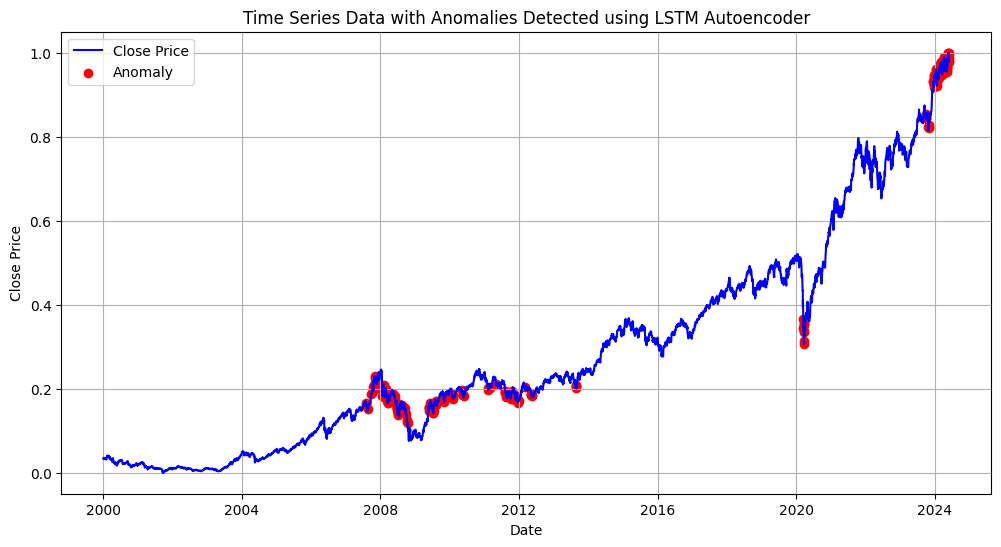

Anomalies:


,Close,Open,High,Low,Volume (in Billion)
Date,,,,,
2007-07-31,0.166173,0.161870,0.164488,0.162430,0.046416
2007-08-02,0.158372,0.157908,0.158441,0.157632,0.039131
2007-08-03,0.160416,0.157881,0.159716,0.158935,0.034597
2007-08-20,0.151711,0.146757,0.152273,0.147747,0.037867
2007-09-28,0.188444,0.186760,0.187948,0.187981,0.075961
...,...,...,...,...,...
2024-05-27,0.998408,1.000000,1.000000,0.998332,0.143475
2024-05-28,0.996405,0.997214,0.994951,0.997756,0.120214
2024-05-29,0.988109,0.987551,0.987168,0.989911,0.148953


In [15]:
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(NIFTY)
scaled_data.set_index('Date', inplace=True)
# Detect anomalies
anomalies = detect_anomalies_lstm_autoencoder(scaled_data)

# Display anomalies (dates)
print("Anomalies:")
anomalies

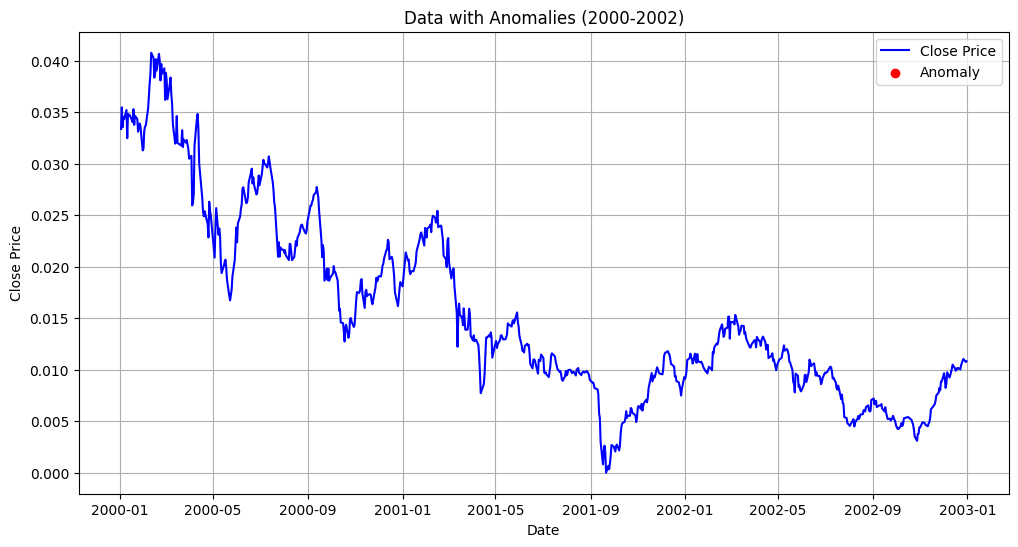

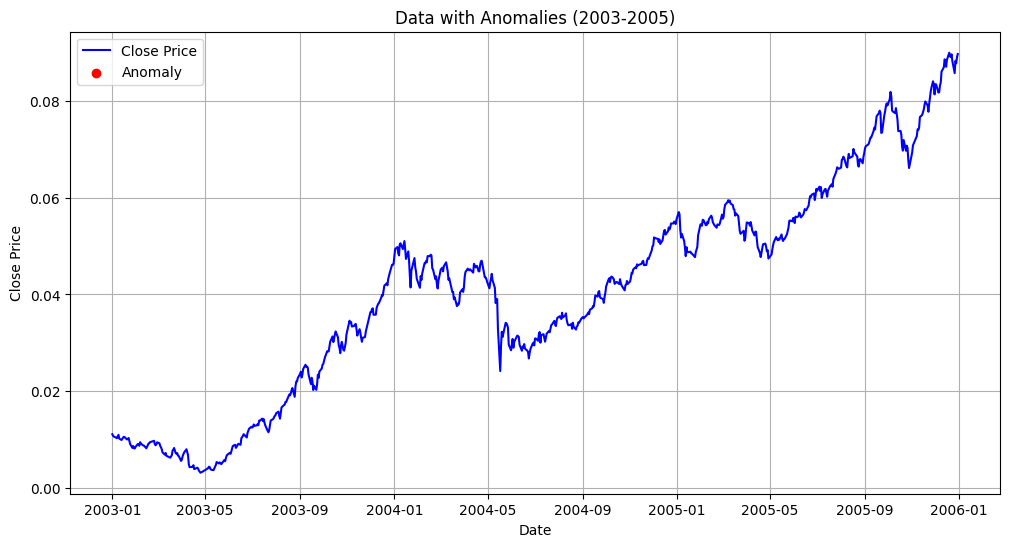

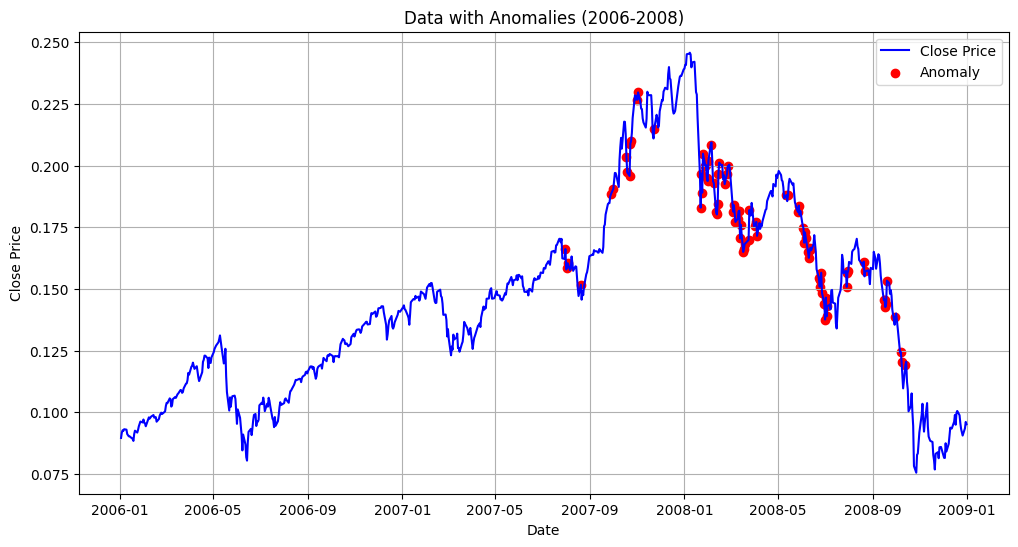

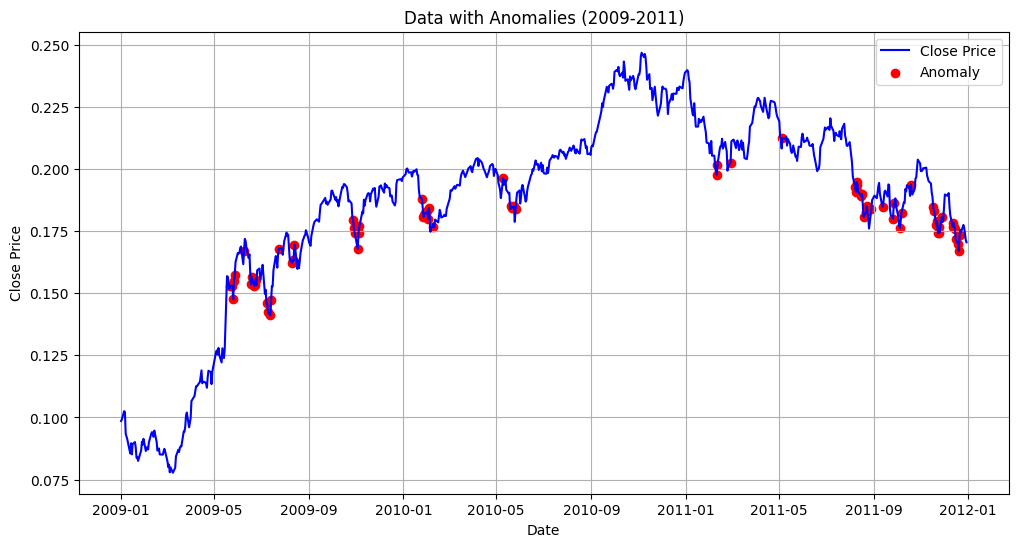

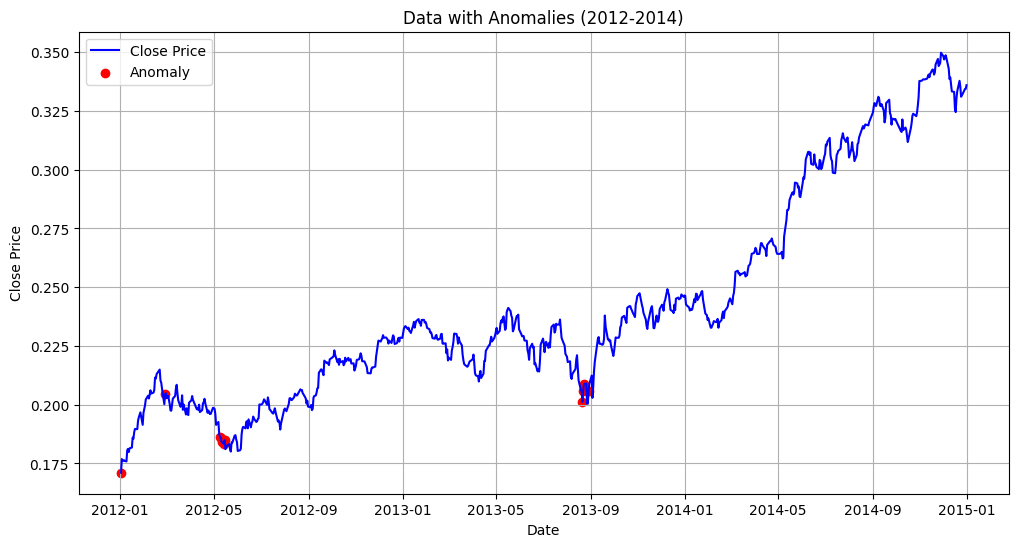

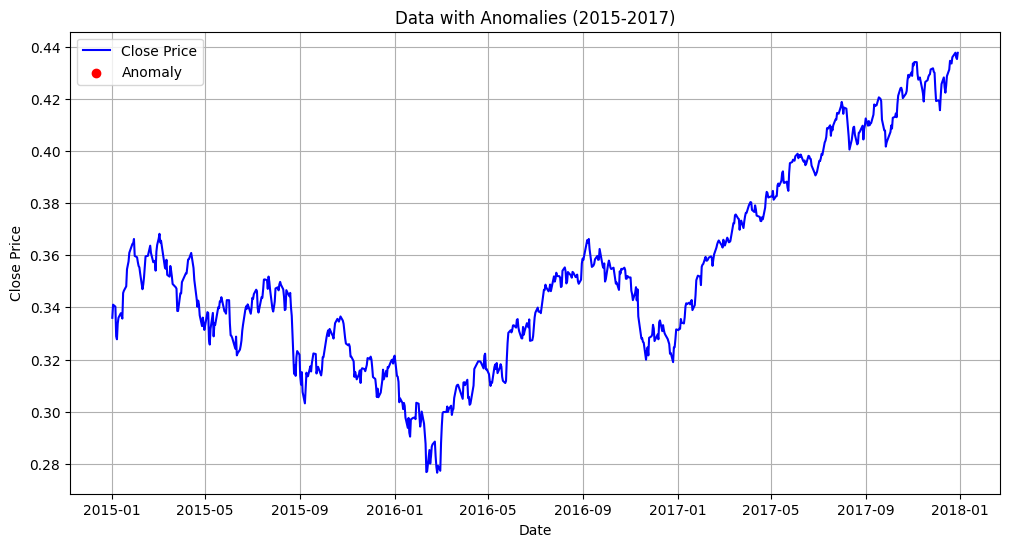

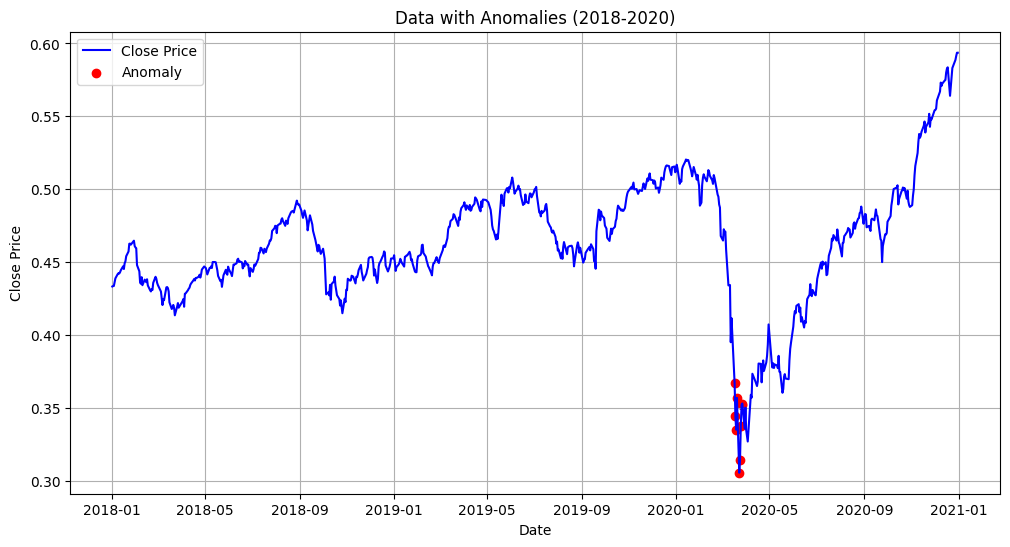

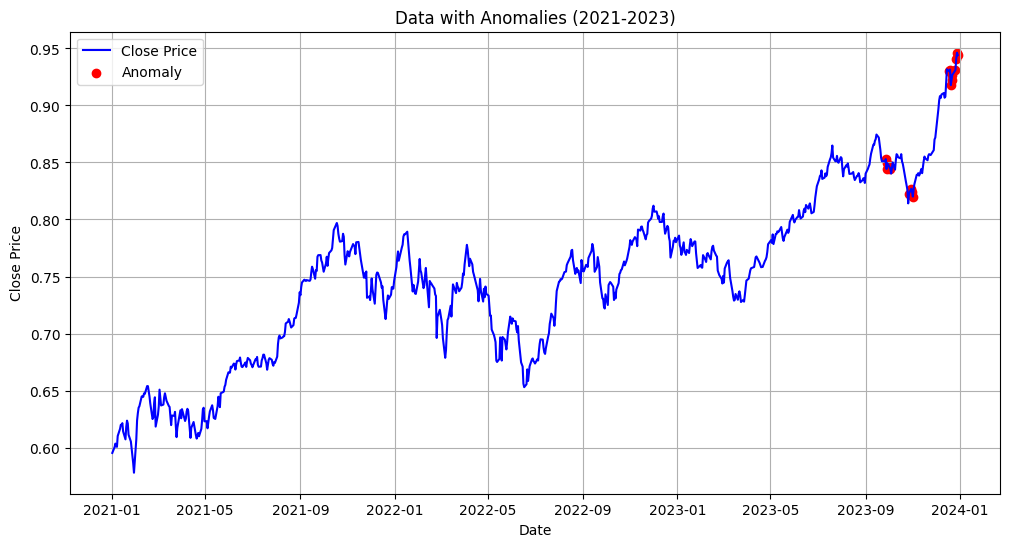

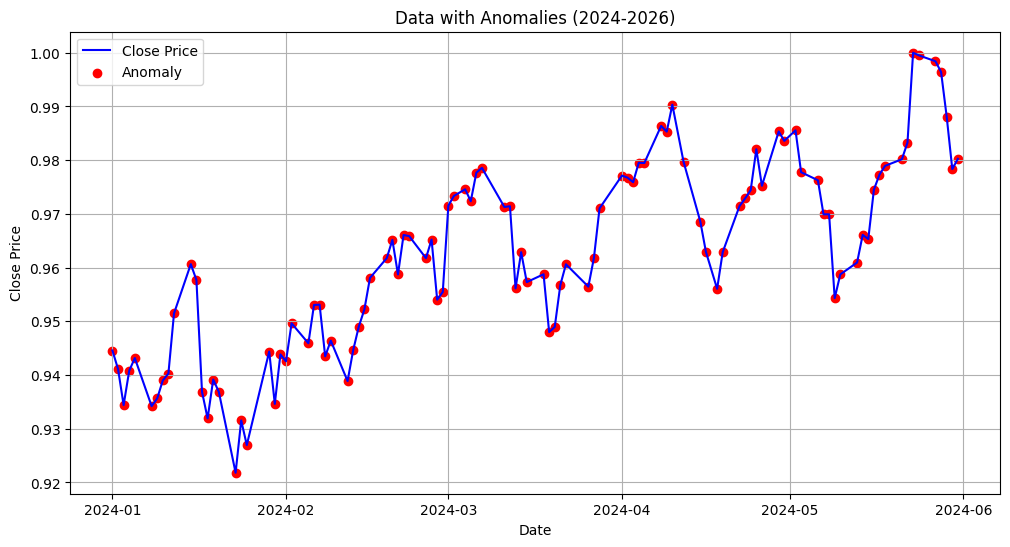

In [16]:
NIFTY_3 = plot_with_anomalies(scaled_data, anomalies, 3)

# IBOVESPA

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0133 - val_loss: 0.0705
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0554 - val_loss: 0.0215
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0286 - val_loss: 0.0329
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0038 - val_loss: 6.6462e-04
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0022 - val_loss: 7.0701e-04
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - val_loss: 0.0083
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - val_loss: 9.3509e-04
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.4954e-04 - val_loss: 7.2495e-04
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 5.0646e-04 - val_loss: 3.6319e-04
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.0702e-04 - val_loss: 3.4843e-04
Epoch 12/50
85/85 ━━━━━━━━━

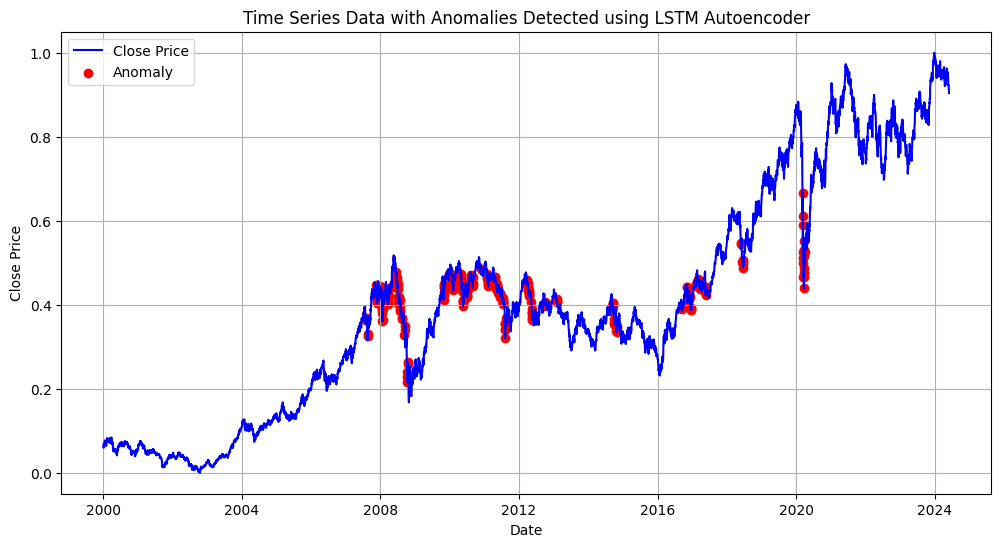

Anomalies:


,Open,High,Low,Close,Volume (in Million)
Date,,,,,
2007-07-30,0.353967,0.367631,0.355872,0.367198,0.198865
2007-07-31,0.367298,0.374558,0.365776,0.364099,0.259557
2007-08-01,0.363864,0.363214,0.356756,0.364504,0.260820
2007-08-02,0.364460,0.368973,0.366039,0.368136,0.200386
2007-08-20,0.319276,0.326194,0.321129,0.324543,0.172863
...,...,...,...,...,...
2020-03-24,0.438858,0.500655,0.440891,0.487653,0.050287
2020-03-25,0.487531,0.541798,0.486717,0.529196,0.055760
2020-03-26,0.529098,0.558735,0.531005,0.551084,0.054929


In [18]:
# Detecting anomaly
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(IBOV)
scaled_data.set_index('Date', inplace=True)
# Detect anomalies
anomalies = detect_anomalies_lstm_autoencoder(scaled_data)

# Display anomalies (dates)
print("Anomalies:")
anomalies

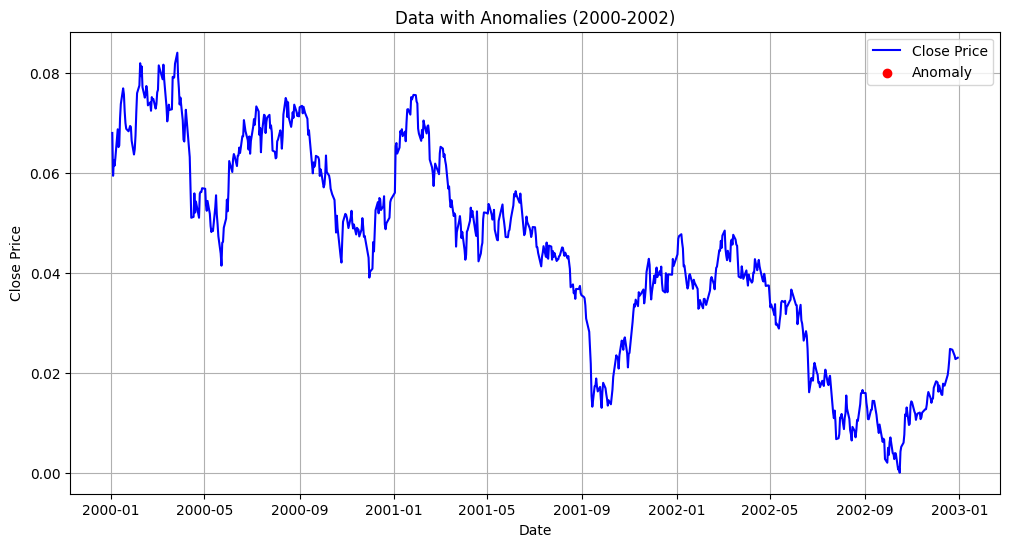

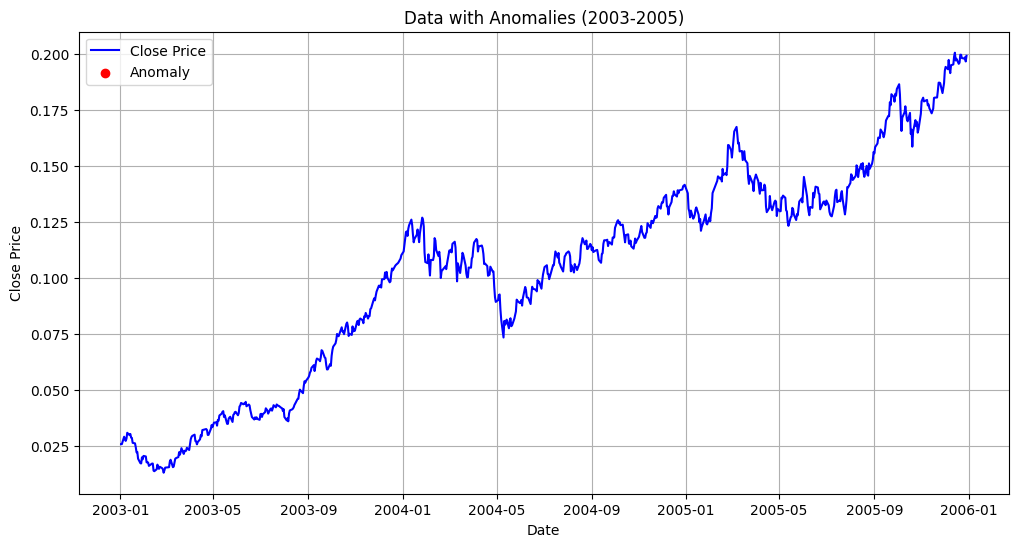

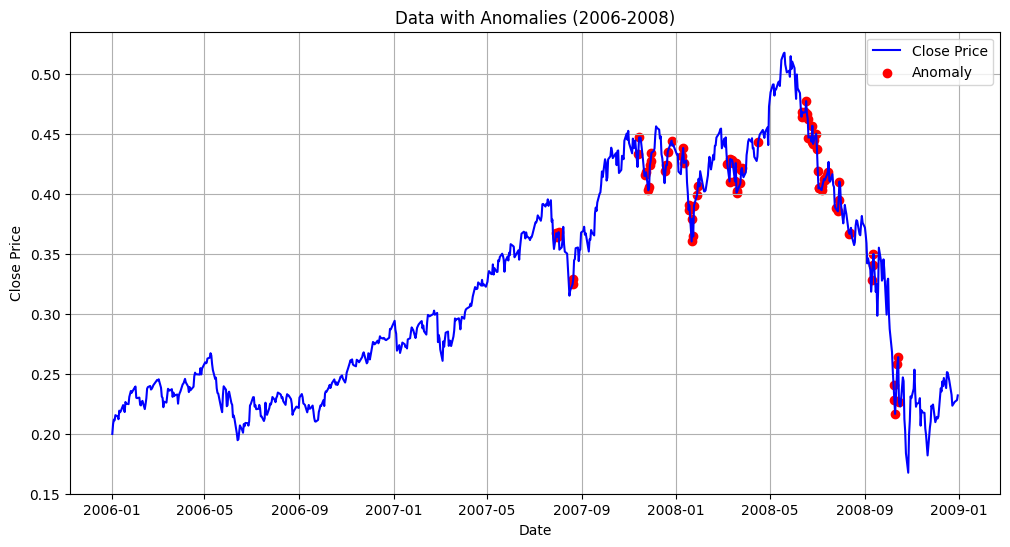

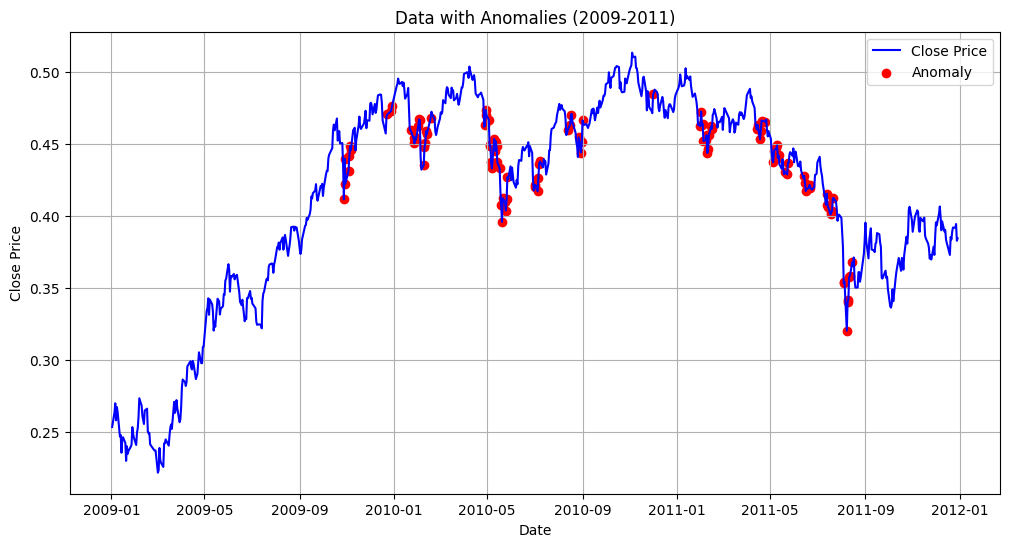

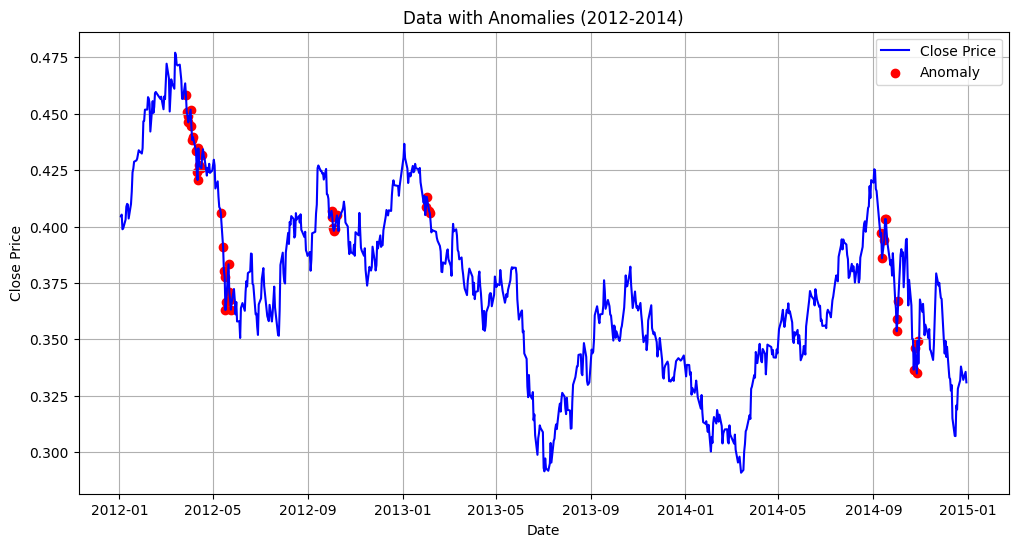

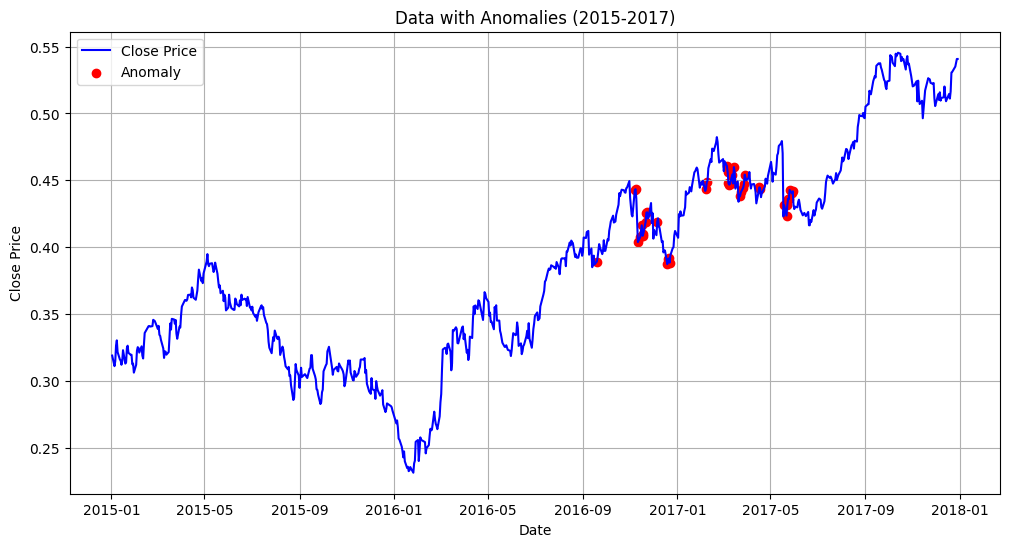

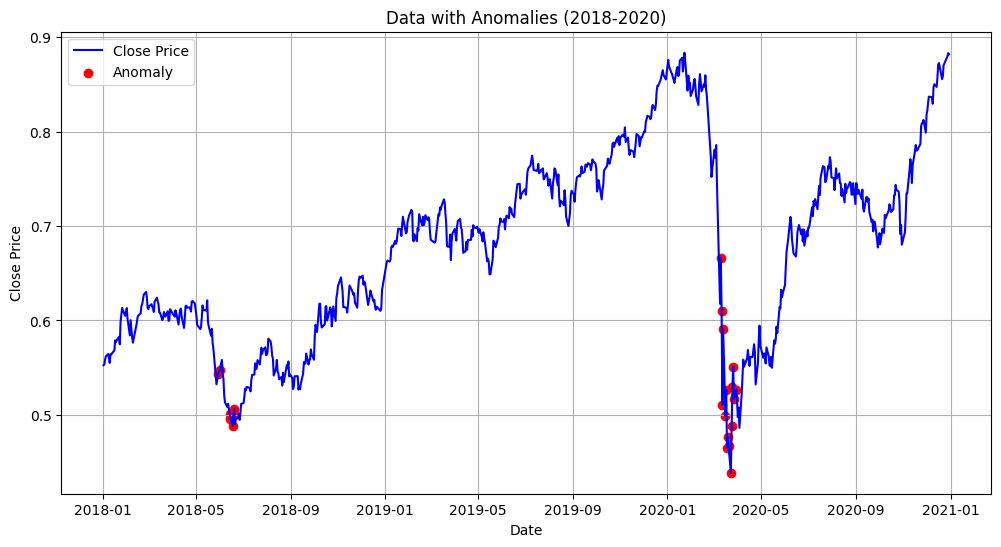

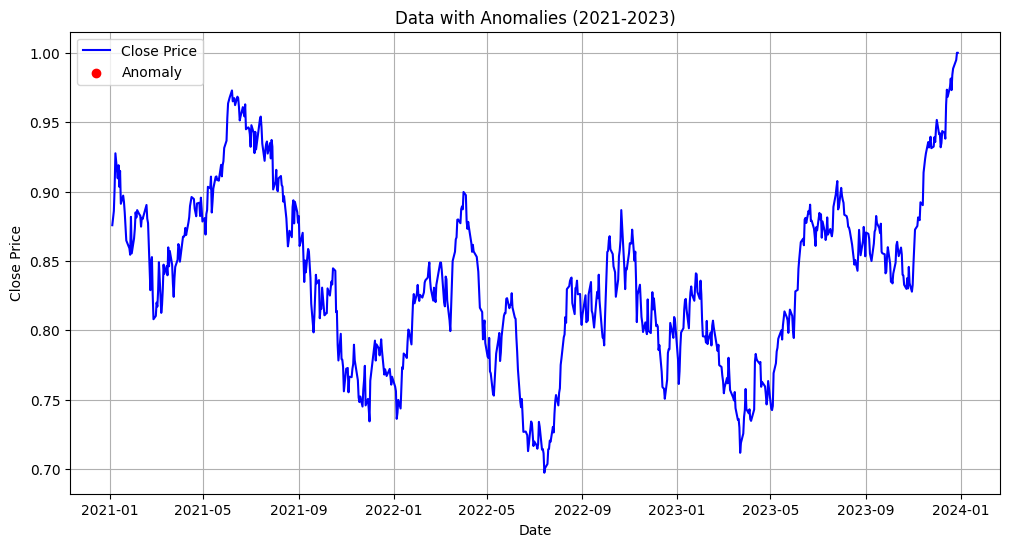

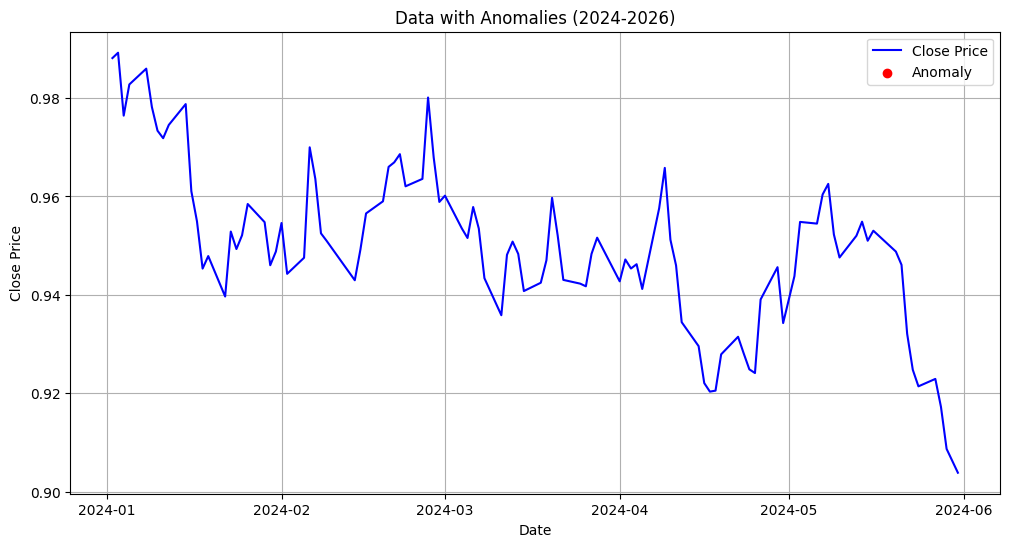

In [19]:
IBOV_3 = plot_with_anomalies(scaled_data, anomalies, 3)